In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import menzalib as mz

In [31]:
ty,Iy=np.loadtxt('2_Theta_par.txt',unpack=True)
tx,Ix=np.loadtxt('2_Theta_perp.txt',unpack=True)

def gauss(x,x_0,sigma,A):
    return A*np.exp(-(x-x_0)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

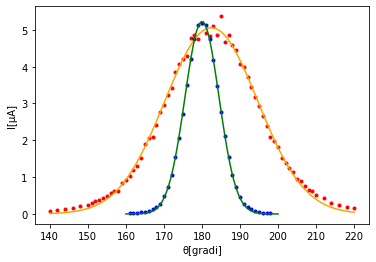

In [41]:
popt,pcov=curve_fit(gauss,tx,Ix,p0=[180,10,50])
x=np.linspace(140,220,100)
y=gauss(x,*popt)
plt.plot(tx,Ix,'r.')
plt.plot(x,y,'-',color='orange')
sigmax,dsigmax=popt[1],pcov[1][1]

popt,pcov=curve_fit(gauss,ty,Iy,p0=[180,20,100])
x=np.linspace(160,200,100)
y=gauss(x,*popt)
plt.plot(ty,Iy,'b.')
plt.plot(x,y,color='green')
sigmay,dsigmay=popt[1],pcov[1][1]


plt.ylabel('I[µA]')
plt.xlabel('θ[gradi]')
plt.savefig('cosa_radiale.eps',format='eps')

In [46]:
print(mz.ne_tex(sigmax,dsigmax))
print(mz.ne_tex(sigmay,dsigmay))

$(1.2207 \pm 0.0007) \times 10^{1}$
$4.4795 \pm 0.0002$
